In [103]:
#importing natural learning tool kit libraries 
#line.strip() will return a new string with all trailing whitespace('tabs','spaces') characters removed from line.
import nltk

messages=[line.rstrip() for line in open(r'C:\Users\ASUS\Downloads\SMSSpamCollection')]

In [104]:
# nltk.download_shell()

In [105]:
print(len(messages))

5574


In [106]:
messages[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [107]:
for mess_no,message in enumerate(messages[0:10],start=1):
    print(mess_no,message)
    print("/n")

1 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
/n
2 ham	Ok lar... Joking wif u oni...
/n
3 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
/n
4 ham	U dun say so early hor... U c already then say...
/n
5 ham	Nah I don't think he goes to usf, he lives around here though
/n
6 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
/n
7 ham	Even my brother is not like to speak with me. They treat me like aids patent.
/n
8 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
/n
9 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C

In [108]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [109]:
import pandas as pd

In [110]:
messages=pd.read_csv(r'C:\Users\ASUS\Downloads\SMSSpamCollection',sep='\t',names=['label','messages'])

In [111]:
messages

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [112]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [113]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [114]:
messages.groupby('label').describe().transpose()

label                               ham  \
messages count                     4825   
         unique                    4516   
         top     Sorry, I'll call later   
         freq                        30   

label                                                         spam  
messages count                                                 747  
         unique                                                653  
         top     Please call our customer service representativ...  
         freq                                                    4

In [115]:
# length column is created to check the length of messages 
messages['length']=messages['messages'].apply(len)


In [116]:
messages

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='length', ylabel='Count'>

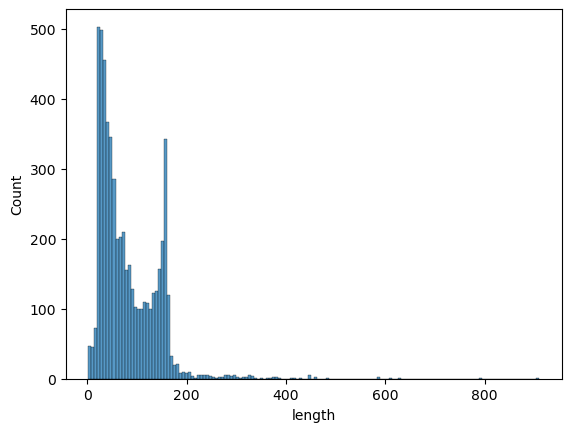

In [118]:
sns.histplot(messages['length'],bins=150
            )

In [119]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [120]:
# Longest message in the dataset 
messages[messages['length']==910]['messages'].iloc[0]


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

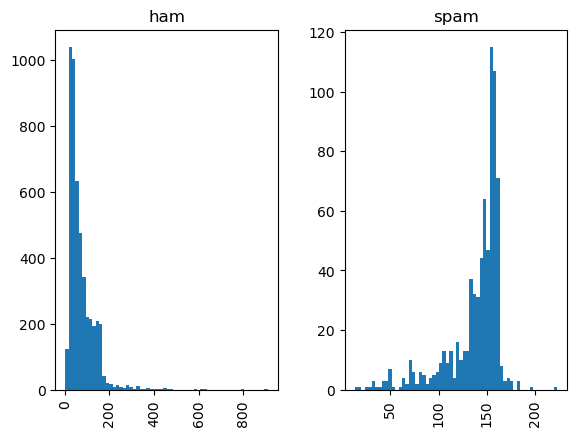

In [121]:
# from the below visualization we can see the length for ham and spam are different which can be used to feature engineering
messages.hist(column='length',by='label',bins=60)


In [122]:
import string

In [123]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [124]:
from nltk.corpus import stopwords

In [125]:
# 1. Remove punctuation if present in any message
# 2. remove stopwords 
# 3. return list of clean words
def text_process(mess):
    nopunc=[x for x in mess if x not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [126]:
messages['messages'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

In [128]:
#bag of words (bow)
bow_transform=CountVectorizer(analyzer=text_process).fit(messages['messages'])

In [129]:
bow_transform.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [130]:
message_bow=bow_transform.transform(messages['messages'])

In [131]:
print("shape of the sparse matrix : ", message_bow.shape)

shape of the sparse matrix :  (5572, 11425)


In [132]:
from sklearn.feature_extraction.text import TfidfTransformer

In [133]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [134]:
messages_tfidf=tfidf_transformer.transform(message_bow)

In [135]:
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['messages'],messages['label'],test_size=0.3,random_state=2)

In [138]:
from sklearn.pipeline import Pipeline

In [139]:
from sklearn.naive_bayes import MultinomialNB

In [140]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),('tfidf',TfidfTransformer())
    ,('classifier',MultinomialNB()) 
])

In [141]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001AC34A13560>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [142]:
prediction = pipeline.predict(msg_test)

In [143]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(label_test,prediction))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1445
        spam       1.00      0.67      0.80       227

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672



In [145]:
messages

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [146]:
#prediction system 
input=[" Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyrone"] # --> PASTE YOUR EMAIL HERE 
input_transform=CountVectorizer(analyzer=text_process).fit(input)
input_transform.vocabulary_
input_bow=input_transform.transform(input)
tfidf_transformer = TfidfTransformer().fit(input_bow)
input_tfidf=tfidf_transformer.transform(input_bow)

prediction = pipeline.predict(input)

if prediction[0] == 'ham':
    print("It's a Ham Email")
else:
    print("It's a Spam Email")



It's a Spam Email
